In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('D:/GSU/Data mining/project/train.csv')
df_weather_train = pd.read_csv('D:/GSU/Data mining/project/weather_train.csv')
df_meta = pd.read_csv('D:/GSU/Data mining/project/building_metadata.csv')

In [3]:
df_test = pd.read_csv('D:/GSU/Data mining/project/test.csv')
df_weather_test = pd.read_csv('D:/GSU/Data mining/project/weather_test.csv')
df_subission = pd.read_csv('D:/GSU/Data mining/project/sample_submission.csv')

In [4]:
df_train[df_train['building_id'] == 1000]

,building_id,meter,timestamp,meter_reading
1379,1000,0,2016-01-01 00:00:00,43.2501
1380,1000,1,2016-01-01 00:00:00,0.0000
1381,1000,3,2016-01-01 00:00:00,399.8640
3675,1000,0,2016-01-01 01:00:00,44.2500
3676,1000,1,2016-01-01 01:00:00,0.0000
...,...,...,...,...
20212800,1000,1,2016-12-31 22:00:00,0.0000
20212801,1000,3,2016-12-31 22:00:00,499.7120
20215164,1000,0,2016-12-31 23:00:00,42.0000
20215165,1000,1,2016-12-31 23:00:00,0.0000


In [5]:
df_meta

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


In [6]:
df_weather_train

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


In [7]:
df_inner = pd.merge(df_train, df_meta, left_on='building_id', right_on='building_id', how='inner')

In [8]:
df_inner = df_inner[['building_id', 'timestamp','site_id', 'meter', 'meter_reading','primary_use', 'square_feet', 'year_built', 'floor_count']]
df_inner

,building_id,timestamp,site_id,meter,meter_reading,primary_use,square_feet,year_built,floor_count
0,0,2016-01-01 00:00:00,0,0,0.00,Education,7432,2008.0,NaN
1,0,2016-01-01 01:00:00,0,0,0.00,Education,7432,2008.0,NaN
2,0,2016-01-01 02:00:00,0,0,0.00,Education,7432,2008.0,NaN
3,0,2016-01-01 03:00:00,0,0,0.00,Education,7432,2008.0,NaN
4,0,2016-01-01 04:00:00,0,0,0.00,Education,7432,2008.0,NaN
...,...,...,...,...,...,...,...,...,...
20216095,403,2016-12-31 19:00:00,3,0,43.66,Education,49500,1962.0,NaN
20216096,403,2016-12-31 20:00:00,3,0,43.64,Education,49500,1962.0,NaN
20216097,403,2016-12-31 21:00:00,3,0,43.89,Education,49500,1962.0,NaN
20216098,403,2016-12-31 22:00:00,3,0,44.37,Education,49500,1962.0,NaN


In [26]:
df_train_total = pd.merge(df_inner, df_weather_train, on = ['timestamp','site_id'], how='left')
df_train_total

,building_id,timestamp,site_id,meter,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,0,0,0.00,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,0,0,0.00,Education,7432,2008.0,NaN,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,0,0,0.00,Education,7432,2008.0,NaN,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,0,0,0.00,Education,7432,2008.0,NaN,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,0,0,0.00,Education,7432,2008.0,NaN,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,403,2016-12-31 19:00:00,3,0,43.66,Education,49500,1962.0,NaN,9.4,NaN,-6.7,0.0,1016.7,200.0,11.8
20216096,403,2016-12-31 20:00:00,3,0,43.64,Education,49500,1962.0,NaN,8.9,NaN,-6.1,0.0,1016.3,200.0,8.2
20216097,403,2016-12-31 21:00:00,3,0,43.89,Education,49500,1962.0,NaN,8.9,6.0,-6.1,0.0,1015.4,190.0,7.7
20216098,403,2016-12-31 22:00:00,3,0,44.37,Education,49500,1962.0,NaN,8.9,NaN,-6.1,0.0,1015.7,200.0,8.2


In [10]:
df = df_train_total[['building_id', 'timestamp', 'site_id',
                     'square_feet', 'year_built', 'floor_count',
                     'air_temperature', 'cloud_coverage', 'dew_temperature',
                     'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
                     'wind_speed', 'meter', 'meter_reading']]

In [11]:
df.columns.tolist()

['building_id',
 'timestamp',
 'site_id',
 'square_feet',
 'year_built',
 'floor_count',
 'air_temperature',
 'cloud_coverage',
 'dew_temperature',
 'precip_depth_1_hr',
 'sea_level_pressure',
 'wind_direction',
 'wind_speed',
 'meter',
 'meter_reading']

In [12]:
df_check = df[['building_id','site_id','square_feet','year_built',
               'floor_count','air_temperature','cloud_coverage','dew_temperature',
               'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction', 'wind_speed',
               'meter','meter_reading']]

dic_new_numerric = {}
for (name, series) in df_check.iteritems():
    dic_new_numerric[name] = [(series.size), # Desc / count 
                              (series.isnull().sum()/series.size)*100, series.unique().size, # %ofMissing / Card. 
                              df[name].min(), df[name].quantile(0.25), # Min / Q1
                              df[name].median(), df[name].quantile(0.75), # Median / Q3
                              df[name].max(), df[name].mean(), df[name].std()," "] # Max / Mean / Std.Dev / Notes

df_new_num = pd.DataFrame(dic_new_numerric, index=['Count','% of Missing','Card.','Min.', 'Q1', 'Median', 'Q3', 'Max', 'Mean', 'Std.Dev.', "Notes"])
df_new_num = df_new_num.transpose()


# Quality report

In [13]:
df_new_num

,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max,Mean,Std.Dev.,Notes
building_id,20216100,0.0,1449,0,393.0,895.0,1179.0,1448,799.278,426.913309,
site_id,20216100,0.0,16,0,3.0,9.0,13.0,15,7.992232,5.09906,
square_feet,20216100,0.0,1397,283,32527.0,72709.0,139113.0,875000,107782.98133,117142.443648,
year_built,20216100,59.990033,117,1900.0,1951.0,1969.0,1993.0,2017.0,1968.276736,30.208153,
floor_count,20216100,82.652772,19,1.0,1.0,3.0,6.0,26.0,4.184848,4.008277,
air_temperature,20216100,0.478124,620,-28.9,8.6,16.7,24.1,47.2,15.987953,10.947293,
cloud_coverage,20216100,43.655131,11,0.0,0.0,0.0,4.0,9.0,1.900423,2.402909,
dew_temperature,20216100,0.495348,523,-35.0,0.0,8.9,16.1,26.1,7.747429,10.178667,
precip_depth_1_hr,20216100,18.544739,129,-1.0,0.0,0.0,0.0,343.0,0.796416,7.468997,
sea_level_pressure,20216100,6.092515,710,968.2,1011.6,1016.0,1020.5,1045.5,1016.085487,7.060539,


# Histogram for each feature

<AxesSubplot:xlabel='square_feet', ylabel='Count'>

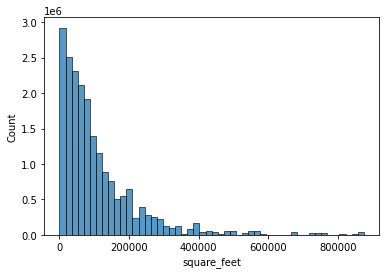

In [14]:
sns.histplot(df['square_feet'], bins=50)

<AxesSubplot:xlabel='year_built', ylabel='Count'>

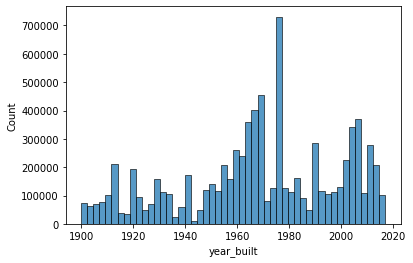

In [15]:
sns.histplot(df['year_built'], bins=50)

<AxesSubplot:xlabel='floor_count', ylabel='Count'>

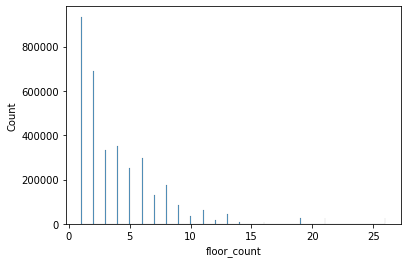

In [16]:
sns.histplot(df['floor_count'])

<AxesSubplot:xlabel='air_temperature', ylabel='Count'>

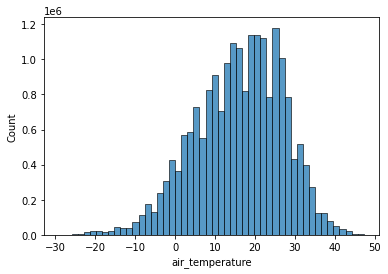

In [17]:
sns.histplot(df['air_temperature'], bins=50)

<AxesSubplot:xlabel='cloud_coverage', ylabel='Count'>

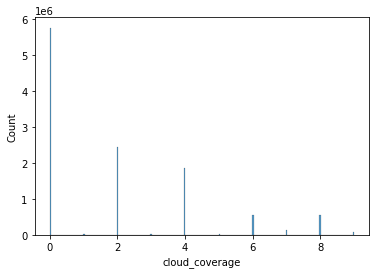

In [18]:
sns.histplot(df['cloud_coverage'])

<AxesSubplot:xlabel='dew_temperature', ylabel='Count'>

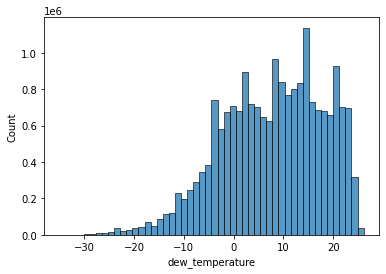

In [19]:
sns.histplot(df['dew_temperature'], bins=50)

<AxesSubplot:xlabel='precip_depth_1_hr', ylabel='Count'>

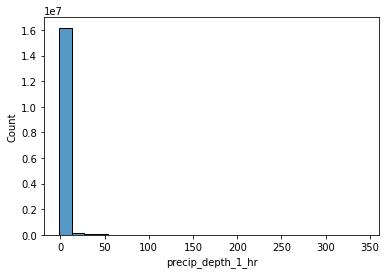

In [20]:
sns.histplot(df['precip_depth_1_hr'])

<AxesSubplot:xlabel='sea_level_pressure', ylabel='Count'>

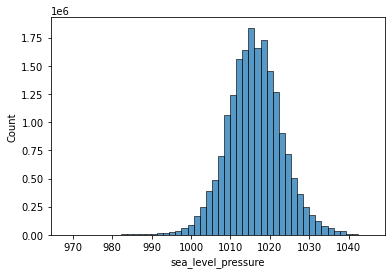

In [21]:
sns.histplot(df['sea_level_pressure'], bins=50)

<AxesSubplot:xlabel='wind_direction', ylabel='Count'>

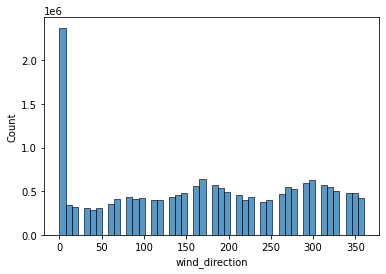

In [22]:
sns.histplot(df['wind_direction'], bins=50)

<AxesSubplot:xlabel='wind_speed', ylabel='Count'>

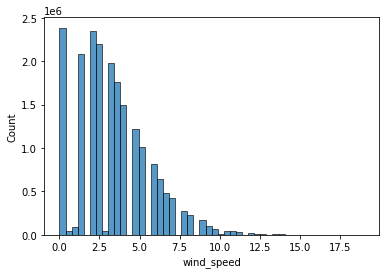

In [23]:
sns.histplot(df['wind_speed'], bins=50)

<AxesSubplot:xlabel='meter', ylabel='Count'>

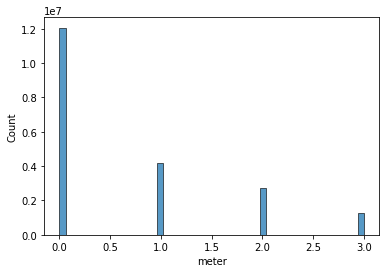

In [24]:
sns.histplot(df['meter'], bins=50)

<AxesSubplot:xlabel='meter_reading', ylabel='Count'>

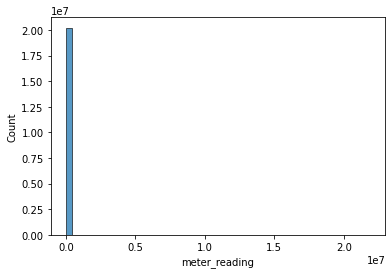

In [25]:
sns.histplot(df['meter_reading'], bins=50)

In [89]:
condition = df_train_total['building_id']==0
df_building_0 = df_train_total.loc[condition]
df_building_0['timestamp'] = pd.to_datetime(df_building_0['timestamp'])
df_building_0['day'] = df_building_0['timestamp'].dt.date
df_building_0['month'] = df_building_0['timestamp'].dt.month

C:\Users\JINSUH~1\AppData\Local\Temp/ipykernel_20588/3827538288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_building_0['timestamp'] = pd.to_datetime(df_building_0['timestamp'])
C:\Users\JINSUH~1\AppData\Local\Temp/ipykernel_20588/3827538288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_building_0['day'] = df_building_0['timestamp'].dt.date
C:\Users\JINSUH~1\AppData\Local\Temp/ipykernel_20588/3827538288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,building_id,timestamp,site_id,meter,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,month
0,0,2016-01-01 00:00:00,0,0,0.000,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2016-01-01,1
1,0,2016-01-01 01:00:00,0,0,0.000,Education,7432,2008.0,NaN,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,2016-01-01,1
2,0,2016-01-01 02:00:00,0,0,0.000,Education,7432,2008.0,NaN,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,2016-01-01,1
3,0,2016-01-01 03:00:00,0,0,0.000,Education,7432,2008.0,NaN,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,2016-01-01,1
4,0,2016-01-01 04:00:00,0,0,0.000,Education,7432,2008.0,NaN,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,2016-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,0,2016-12-31 19:00:00,0,0,232.071,Education,7432,2008.0,NaN,22.8,NaN,10.0,0.0,1021.7,140.0,5.7,2016-12-31,12
8780,0,2016-12-31 20:00:00,0,0,189.069,Education,7432,2008.0,NaN,23.3,NaN,8.9,0.0,1021.0,170.0,4.1,2016-12-31,12
8781,0,2016-12-31 21:00:00,0,0,169.958,Education,7432,2008.0,NaN,23.3,NaN,10.0,0.0,1021.1,150.0,4.1,2016-12-31,12
8782,0,2016-12-31 22:00:00,0,0,169.958,Education,7432,2008.0,NaN,22.8,NaN,10.0,0.0,1021.1,160.0,3.1,2016-12-31,12


In [144]:
df_building_0

,building_id,site_id,meter,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,month
timestamp,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,2016-01-01,1
2016-01-01 01:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,2016-01-01,1
2016-01-01 02:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,2016-01-01,1
2016-01-01 03:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,2016-01-01,1
2016-01-01 04:00:00,0,0,0,0.000,Education,7432,2008.0,NaN,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,2016-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,0,0,0,232.071,Education,7432,2008.0,NaN,22.8,NaN,10.0,0.0,1021.7,140.0,5.7,2016-12-31,12
2016-12-31 20:00:00,0,0,0,189.069,Education,7432,2008.0,NaN,23.3,NaN,8.9,0.0,1021.0,170.0,4.1,2016-12-31,12
2016-12-31 21:00:00,0,0,0,169.958,Education,7432,2008.0,NaN,23.3,NaN,10.0,0.0,1021.1,150.0,4.1,2016-12-31,12


<AxesSubplot:xlabel='day', ylabel='meter_reading'>

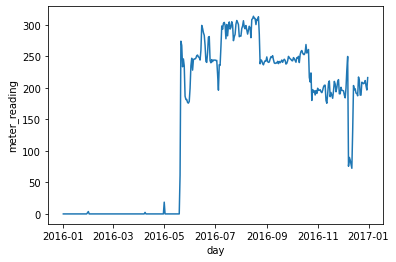

In [94]:
# building '0' lineplot per month
sns.lineplot(data = df_building_0, x='day', y= 'meter_reading', ci=None, estimator='mean')

<AxesSubplot:xlabel='month', ylabel='meter_reading'>

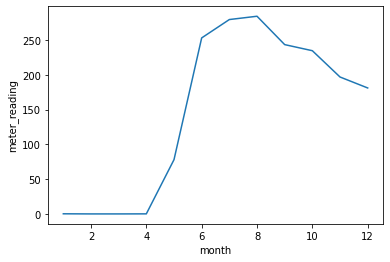

In [97]:
sns.lineplot(data = df_building_0, x='month', y= 'meter_reading', ci=None, estimator='mean')

In [126]:
df_bl0 = pd.pivot_table(data=df_building_0, index='timestamp', values='meter_reading', aggfunc='mean')

In [131]:
y = df_bl0['meter_reading'].resample('1D').mean()
y

timestamp
2016-01-01      0.000000
2016-01-02      0.000000
2016-01-03      0.000000
2016-01-04      0.000000
2016-01-05      0.000000
                 ...    
2016-12-27    207.953333
2016-12-28    211.792750
2016-12-29    203.431500
2016-12-30    196.776458
2016-12-31    216.485375
Freq: D, Name: meter_reading, Length: 366, dtype: float64

In [140]:
from pylab import rcParams
import matplotlib as mpl

In [141]:
rcParams['figure.figsize'] = 15,10

#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [142]:
import statsmodels.tsa.api as tsa
import matplotlib.pyplot as plt

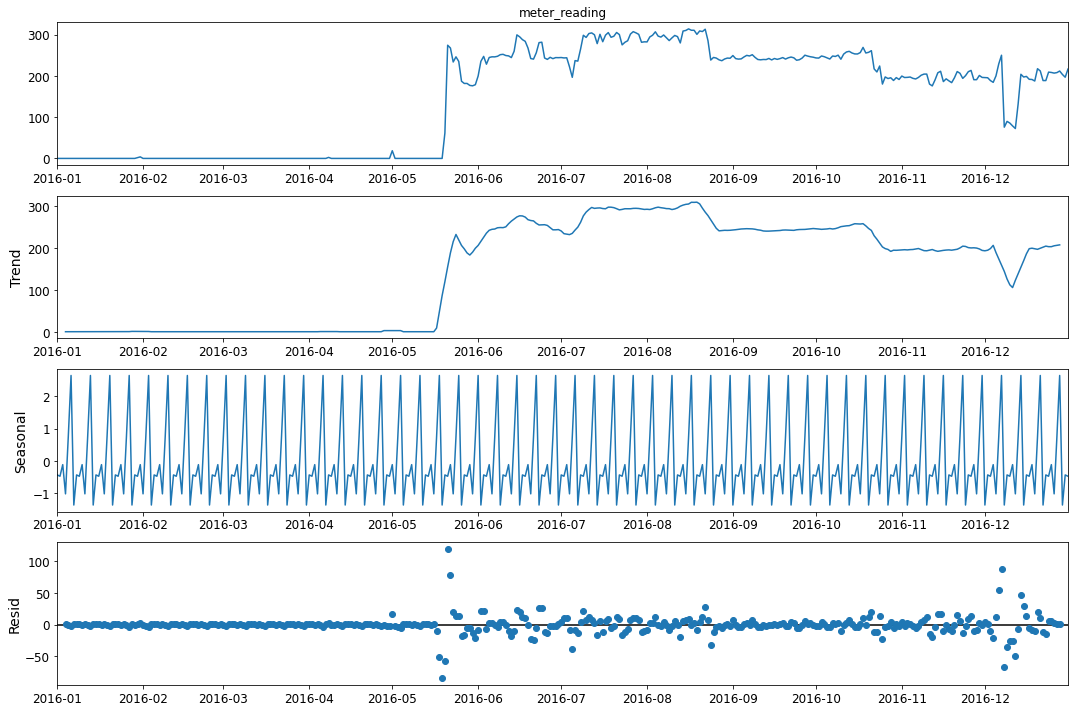

In [143]:
model_series = tsa.seasonal_decompose(y, model='additive')
model_series.plot()
plt.show()